# **Case Study**
(Available on datacamp.com)

![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

# **Solution**

### The project involves:
- Importing the CSV file into a Pandas dataframe
- Filtering the data, to find enteries for only movies. This helps us eliminate TV Shows from our analysis, which might skew the results as TV Show episodes are typically shorter (< 60 minutes), and a year where many TV shows were released might cause the duration to skew significantly lower in the plot
- Then perform some other cleaning operations on the data, selecting only the relevant columns and viewing the shorter movies to see if we can derive any insights
- Finally, we create a plot of the entire `netflix_movies` dataframe in order to visualize the trend of movie duration over time, for the given genres.

After performing these tasks in exploratory data analysis, we can come to a conclusion that gives us more information about our data: "Are movies really becoming shorter?"

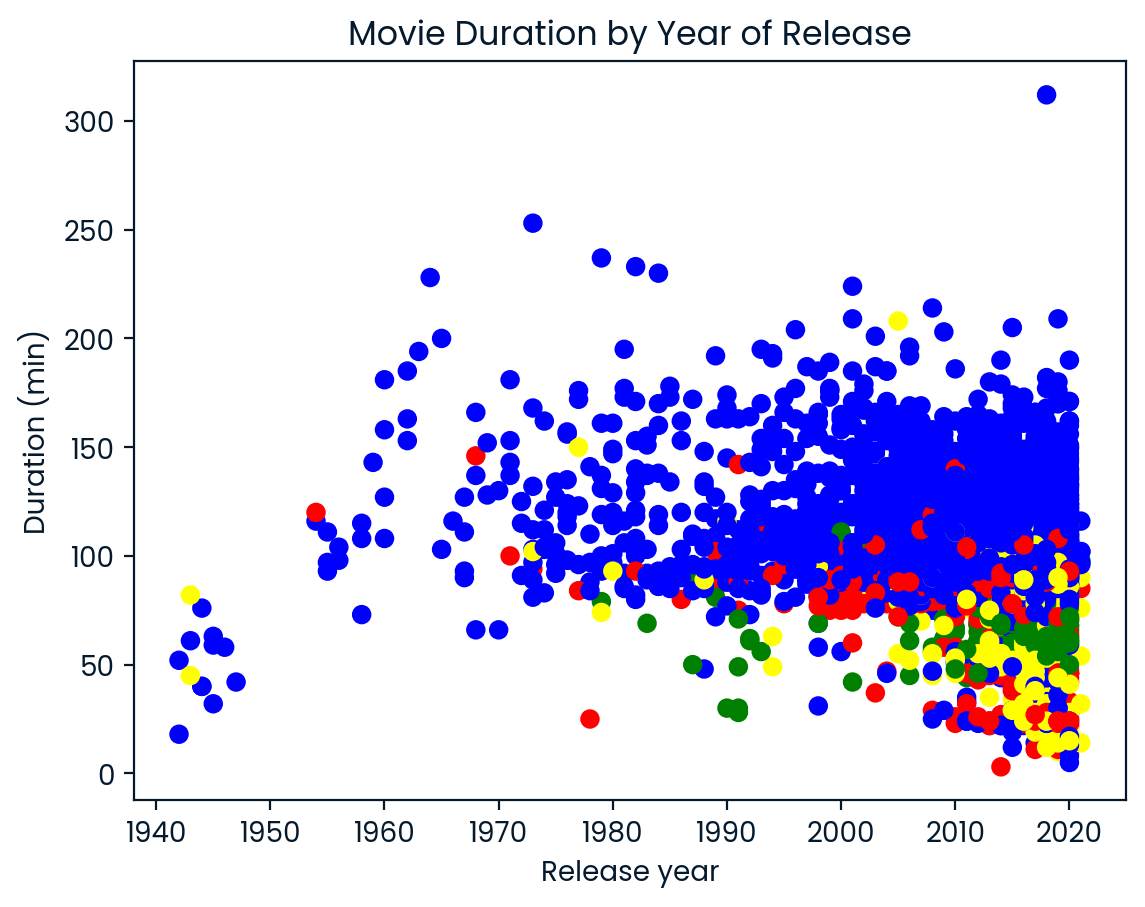

In [2]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Retrieve the csv file as a dataframe:
netflix_df = pd.read_csv('netflix_data.csv', index_col=0)

# Filtering out TV Shows
netflix_subset = netflix_df[netflix_df["type"] == 'Movie']

# Subsetting the `netflix_subset` dataframe to retrieve only the relevant columns:
netflix_movies = netflix_subset.loc[:, ["title", "country", "genre", "release_year", "duration"]]

# Subsetting the `netflix_movies` dataframe to retrieve movies that meet the duration criteria:
short_movies = netflix_movies[netflix_movies["duration"] < 60]

# Assigning colors to each genre:
colors = []
for lab, row in netflix_movies.iterrows():
    if row["genre"] == 'Children' :
        colors.append('red')
    elif row["genre"] == 'Documentaries' :
        colors.append('yellow')
    elif row["genre"] == 'Stand-Up' :
        colors.append('green')
    else :
        colors.append('blue')

# Initialize a matplotlib figure object
fig = plt.figure()

# Create a scatter plot for movie duration by release year
scatter = plt.scatter(netflix_movies["release_year"], netflix_movies["duration"], c=colors)

# Label the axes
plt.xlabel('Release year')
plt.ylabel('Duration (min)')

# Add a title
plt.title('Movie Duration by Year of Release')

# Show the plot
plt.show()

# Since our analysis does not show a significant correlation betweeen movie duration and years of release, we can answer our initial question:
answer = 'no'

